<a href="https://colab.research.google.com/github/nauraalwa/YOLOv8-Streamlit-App/blob/main/Bone_Fracture_Classfication_using_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages & Load the dataset from Kaggle

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# import all of the libraries
from ultralytics import YOLO
import os
import torch
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import sys
import kagglehub

print('System Version:', sys.version)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

# shows the path to the dataset
path = kagglehub.dataset_download("pkdarabi/bone-fracture-detection-computer-vision-project")
print("Path to dataset files:", path)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
System Version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Numpy version 2.0.2
Pandas version 2.2.2
Path to dataset files: /kaggle/input/bone-fracture-detection-computer-vision-project


See the data

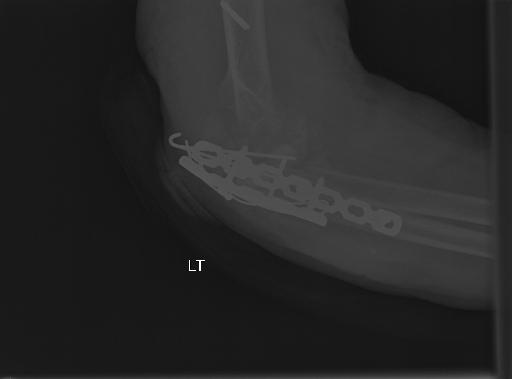

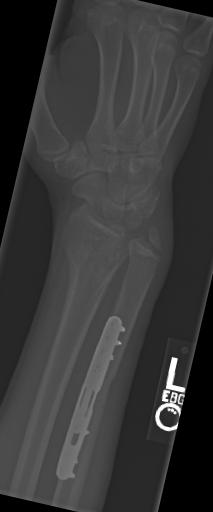

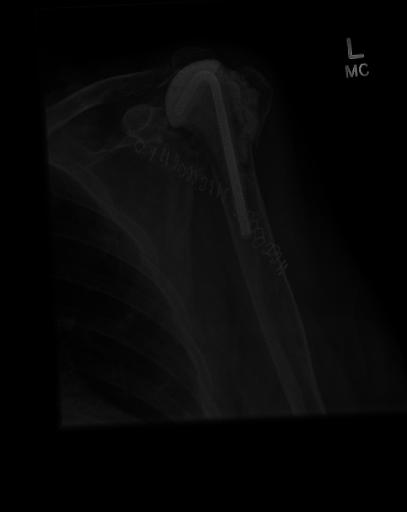

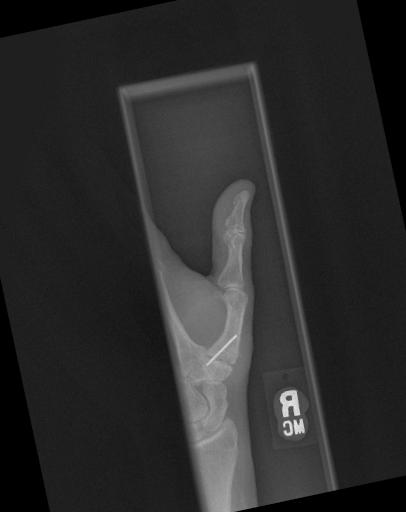

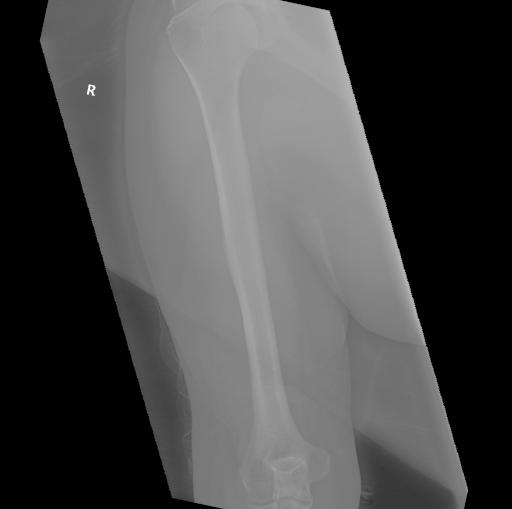

In [ ]:
imgs_dir = "/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/images"

for file in os.listdir(imgs_dir)[:5]:
  img_path = os.path.join(imgs_dir, file)
  img = cv2.imread(img_path)

  cv2_imshow(img)

Train YOLOv8



In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# start YOLO training
model = YOLO("yolov8s.pt")
model.train(data="/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml", epochs=20, imgsz=640, batch=16)

100%|██████████| 21.5M/21.5M [00:00<00:00, 299MB/s]


Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Model summary: 129 layers, 11,138,309 parameters, 11,138,293 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 388MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.1±0.2 ms, read: 2.6±1.1 MB/s, size: 12.1 KB)


train: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:40<00:00, 90.38it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1.8±0.3 MB/s, size: 9.2 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:03<00:00, 91.46it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.68G      2.715      7.153      2.359         22        640: 100%|██████████| 227/227 [01:17<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        348        204     0.0106      0.209     0.0231    0.00745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.88G      2.532      4.058      2.298         11        640: 100%|██████████| 227/227 [01:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.04it/s]


                   all        348        204      0.419     0.0584     0.0425      0.014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.91G      2.458      3.781      2.269         17        640: 100%|██████████| 227/227 [01:11<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.04it/s]


                   all        348        204      0.771     0.0572     0.0606     0.0161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.95G      2.413      3.539      2.223         19        640: 100%|██████████| 227/227 [01:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.82it/s]

                   all        348        204      0.274      0.104      0.079     0.0259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.99G      2.336      3.318      2.134         12        640: 100%|██████████| 227/227 [01:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.90it/s]


                   all        348        204       0.37      0.118      0.104     0.0377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.02G      2.217       3.07      2.076         20        640: 100%|██████████| 227/227 [01:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.79it/s]


                   all        348        204      0.216      0.191      0.135     0.0472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.06G      2.175      2.886      2.029         13        640: 100%|██████████| 227/227 [01:16<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.02it/s]


                   all        348        204      0.158      0.157      0.117     0.0454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       5.1G      2.147      2.778      2.017         23        640: 100%|██████████| 227/227 [01:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.30it/s]


                   all        348        204       0.23      0.209      0.163     0.0604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.13G       2.08      2.673      1.957         21        640: 100%|██████████| 227/227 [01:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        348        204      0.335      0.214      0.183     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.17G      2.016      2.555        1.9         18        640: 100%|██████████| 227/227 [01:11<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        348        204      0.221      0.276      0.225     0.0794


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       5.2G      2.015      2.465      2.065          7        640: 100%|██████████| 227/227 [01:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.90it/s]


                   all        348        204       0.23      0.246      0.176     0.0693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.24G      1.934        2.3      1.991         11        640: 100%|██████████| 227/227 [01:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.30it/s]

                   all        348        204      0.312      0.267      0.247     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.28G      1.878      2.163      1.966          6        640: 100%|██████████| 227/227 [01:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.90it/s]


                   all        348        204      0.237      0.303      0.214     0.0798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.32G      1.845      2.001      1.941          8        640: 100%|██████████| 227/227 [01:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.10it/s]

                   all        348        204      0.352       0.26      0.257     0.0956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.35G      1.762      1.884      1.878         11        640: 100%|██████████| 227/227 [01:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.41it/s]


                   all        348        204      0.342      0.296      0.255     0.0893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.39G      1.729       1.73      1.845         12        640: 100%|██████████| 227/227 [01:06<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.10it/s]


                   all        348        204      0.445      0.269      0.283       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.43G      1.649      1.617      1.771         11        640: 100%|██████████| 227/227 [01:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.33it/s]


                   all        348        204      0.366      0.266      0.279     0.0967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.46G      1.605      1.522      1.734         12        640: 100%|██████████| 227/227 [01:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.09it/s]

                   all        348        204       0.38      0.274      0.285     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.49G      1.542       1.41      1.707          7        640: 100%|██████████| 227/227 [01:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.30it/s]

                   all        348        204      0.335      0.292      0.273      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.53G      1.481       1.32      1.644         11        640: 100%|██████████| 227/227 [01:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.96it/s]


                   all        348        204      0.371      0.287       0.28      0.108

20 epochs completed in 0.408 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]


                   all        348        204      0.445      0.269      0.283       0.11
        elbow positive         28         29      0.162      0.103     0.0888     0.0403
      fingers positive         41         48      0.535      0.167       0.23     0.0594
      forearm fracture         37         43      0.631      0.488      0.532      0.209
               humerus         31         36      0.638        0.5      0.493      0.212
     shoulder fracture         19         20      0.426       0.25      0.274      0.119
        wrist positive         17         28      0.278      0.107     0.0809     0.0198
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a606d62b090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

Plot Train Results


In [ ]:
# get the results csv
results_csv = pd.read_csv("runs/detect/train2/results.csv")

In [ ]:
# get the first 5 rows
results_csv.head()

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   90.2341         2.71546         7.15348         2.35921   
1      2  173.4350         2.53209         4.05813         2.29791   
2      3  255.8280         2.45802         3.78095         2.26916   
3      4  338.7100         2.41279         3.53944         2.22342   
4      5  420.5330         2.33564         3.31825         2.13435   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.01058            0.20855           0.02306   
1               0.41874            0.05838           0.04247   
2               0.77076            0.05717           0.06059   
3               0.27447            0.10422           0.07901   
4               0.36992            0.11827           0.10426   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00745       2.68541       4.54377       2.40819  0.000302   
1              0.01401       2.49205       3.89895       2.40214  0.000575   
2              0.01615       2.48067       3.53727       2.47651  0.000818   
3              0.02591       2.42645       3.82609       2.46134  0.000774   
4              0.03773       2.38590       3.56648       2.36447  0.000729   

     lr/pg1    lr/pg2  
0  0.000302  0.000302  
1  0.000575  0.000575  
2  0.000818  0.000818  
3  0.000774  0.000774  
4  0.000729  0.000729

In [ ]:
# get the column names
results_csv.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

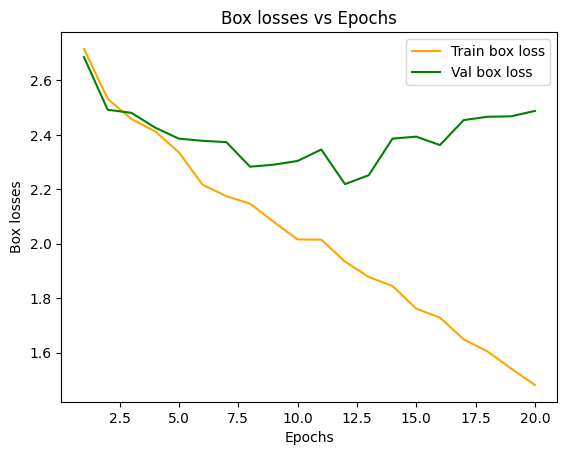

In [ ]:
# plot box losses vs epochs
plt.plot(range(1,21), results_csv["train/box_loss"], color="orange", label="Train box loss")
plt.plot(range(1,21), results_csv["val/box_loss"], color="green", label="Val box loss")
plt.xlabel("Epochs")
plt.ylabel("Box losses")
plt.title("Box losses vs Epochs")
plt.legend()

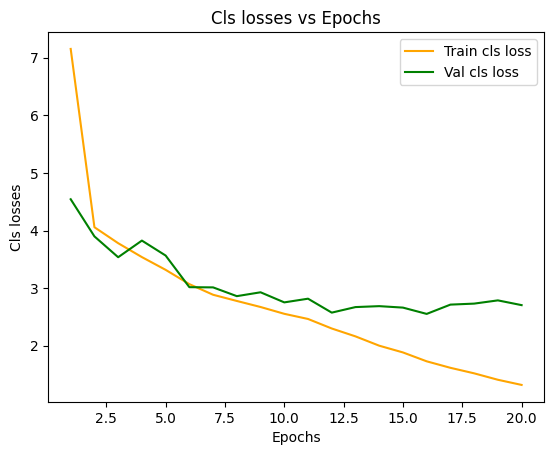

In [ ]:
# plot cls losses vs epochs
plt.plot(range(1, 21), results_csv["train/cls_loss"], color= "orange", label= "Train cls loss")
plt.plot(range(1, 21), results_csv["val/cls_loss"], color= "green", label= "Val cls loss")
plt.xlabel("Epochs")
plt.ylabel("Cls losses")
plt.title("Cls losses vs Epochs")
plt.legend()

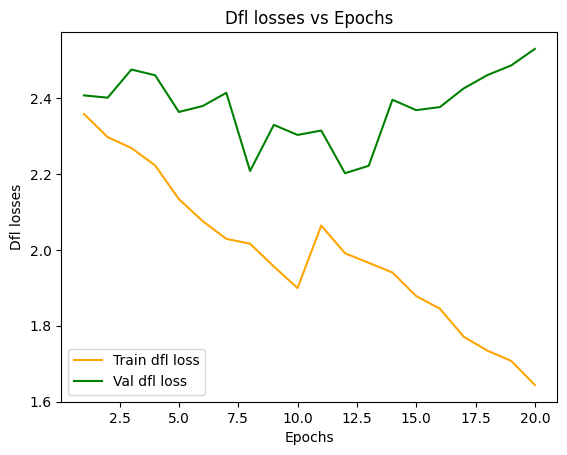

In [ ]:
# plot dfl losses vs epochs
plt.plot(range(1, 21), results_csv["train/dfl_loss"], color= "orange", label= "Train dfl loss")
plt.plot(range(1, 21), results_csv["val/dfl_loss"], color= "green", label= "Val dfl loss")
plt.xlabel("Epochs")
plt.ylabel("Dfl losses")
plt.title("Dfl losses vs Epochs")
plt.legend()

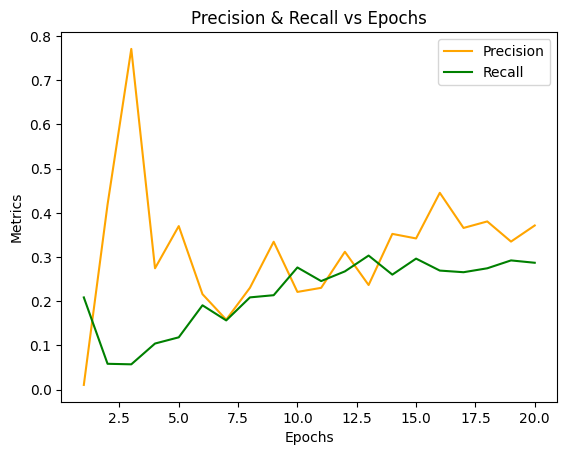

In [ ]:
# plot precision & recall vs epochs
plt.plot(range(1, 21), results_csv["metrics/precision(B)"], color= "orange", label= "Precision")
plt.plot(range(1, 21), results_csv["metrics/recall(B)"], color= "green", label= "Recall")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Precision & Recall vs Epochs")
plt.legend()

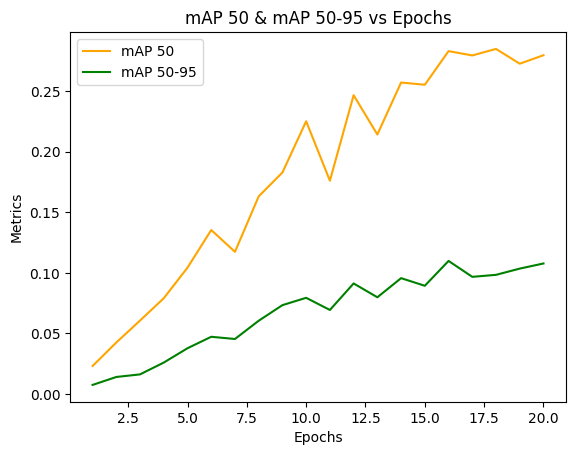

In [ ]:
# plot map 50 and map 50-95 vs epochs
plt.plot(range(1, 21), results_csv["metrics/mAP50(B)"], color= "orange", label= "mAP 50")
plt.plot(range(1, 21), results_csv["metrics/mAP50-95(B)"], color= "green", label= "mAP 50-95")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("mAP 50 & mAP 50-95 vs Epochs")
plt.legend()

Validation


In [ ]:
# validate the trained model
model = YOLO("runs/detect/train2/weights/best.pt")
model.val(data="/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml")

Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 27.0±11.9 MB/s, size: 10.4 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 398.15it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.42it/s]


                   all        348        204      0.455      0.265       0.28      0.109
        elbow positive         28         29      0.172      0.103     0.0939      0.042
      fingers positive         41         48      0.543      0.167      0.216     0.0564
      forearm fracture         37         43      0.629      0.488      0.527      0.208
               humerus         31         36      0.664      0.472      0.493      0.212
     shoulder fracture         19         20      0.436       0.25      0.269      0.116
        wrist positive         17         28      0.284      0.107     0.0799     0.0183
Speed: 1.6ms preprocess, 7.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac3d09d1010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

Plot Validation Result


In [ ]:
# see the validation results
os.listdir("runs/detect/val")

['R_curve.png',
 'val_batch0_pred.jpg',
 'confusion_matrix_normalized.png',
 'confusion_matrix.png',
 'val_batch2_pred.jpg',
 'val_batch0_labels.jpg',
 'P_curve.png',
 'val_batch1_labels.jpg',
 'val_batch1_pred.jpg',
 'F1_curve.png',
 'val_batch2_labels.jpg',
 'PR_curve.png']

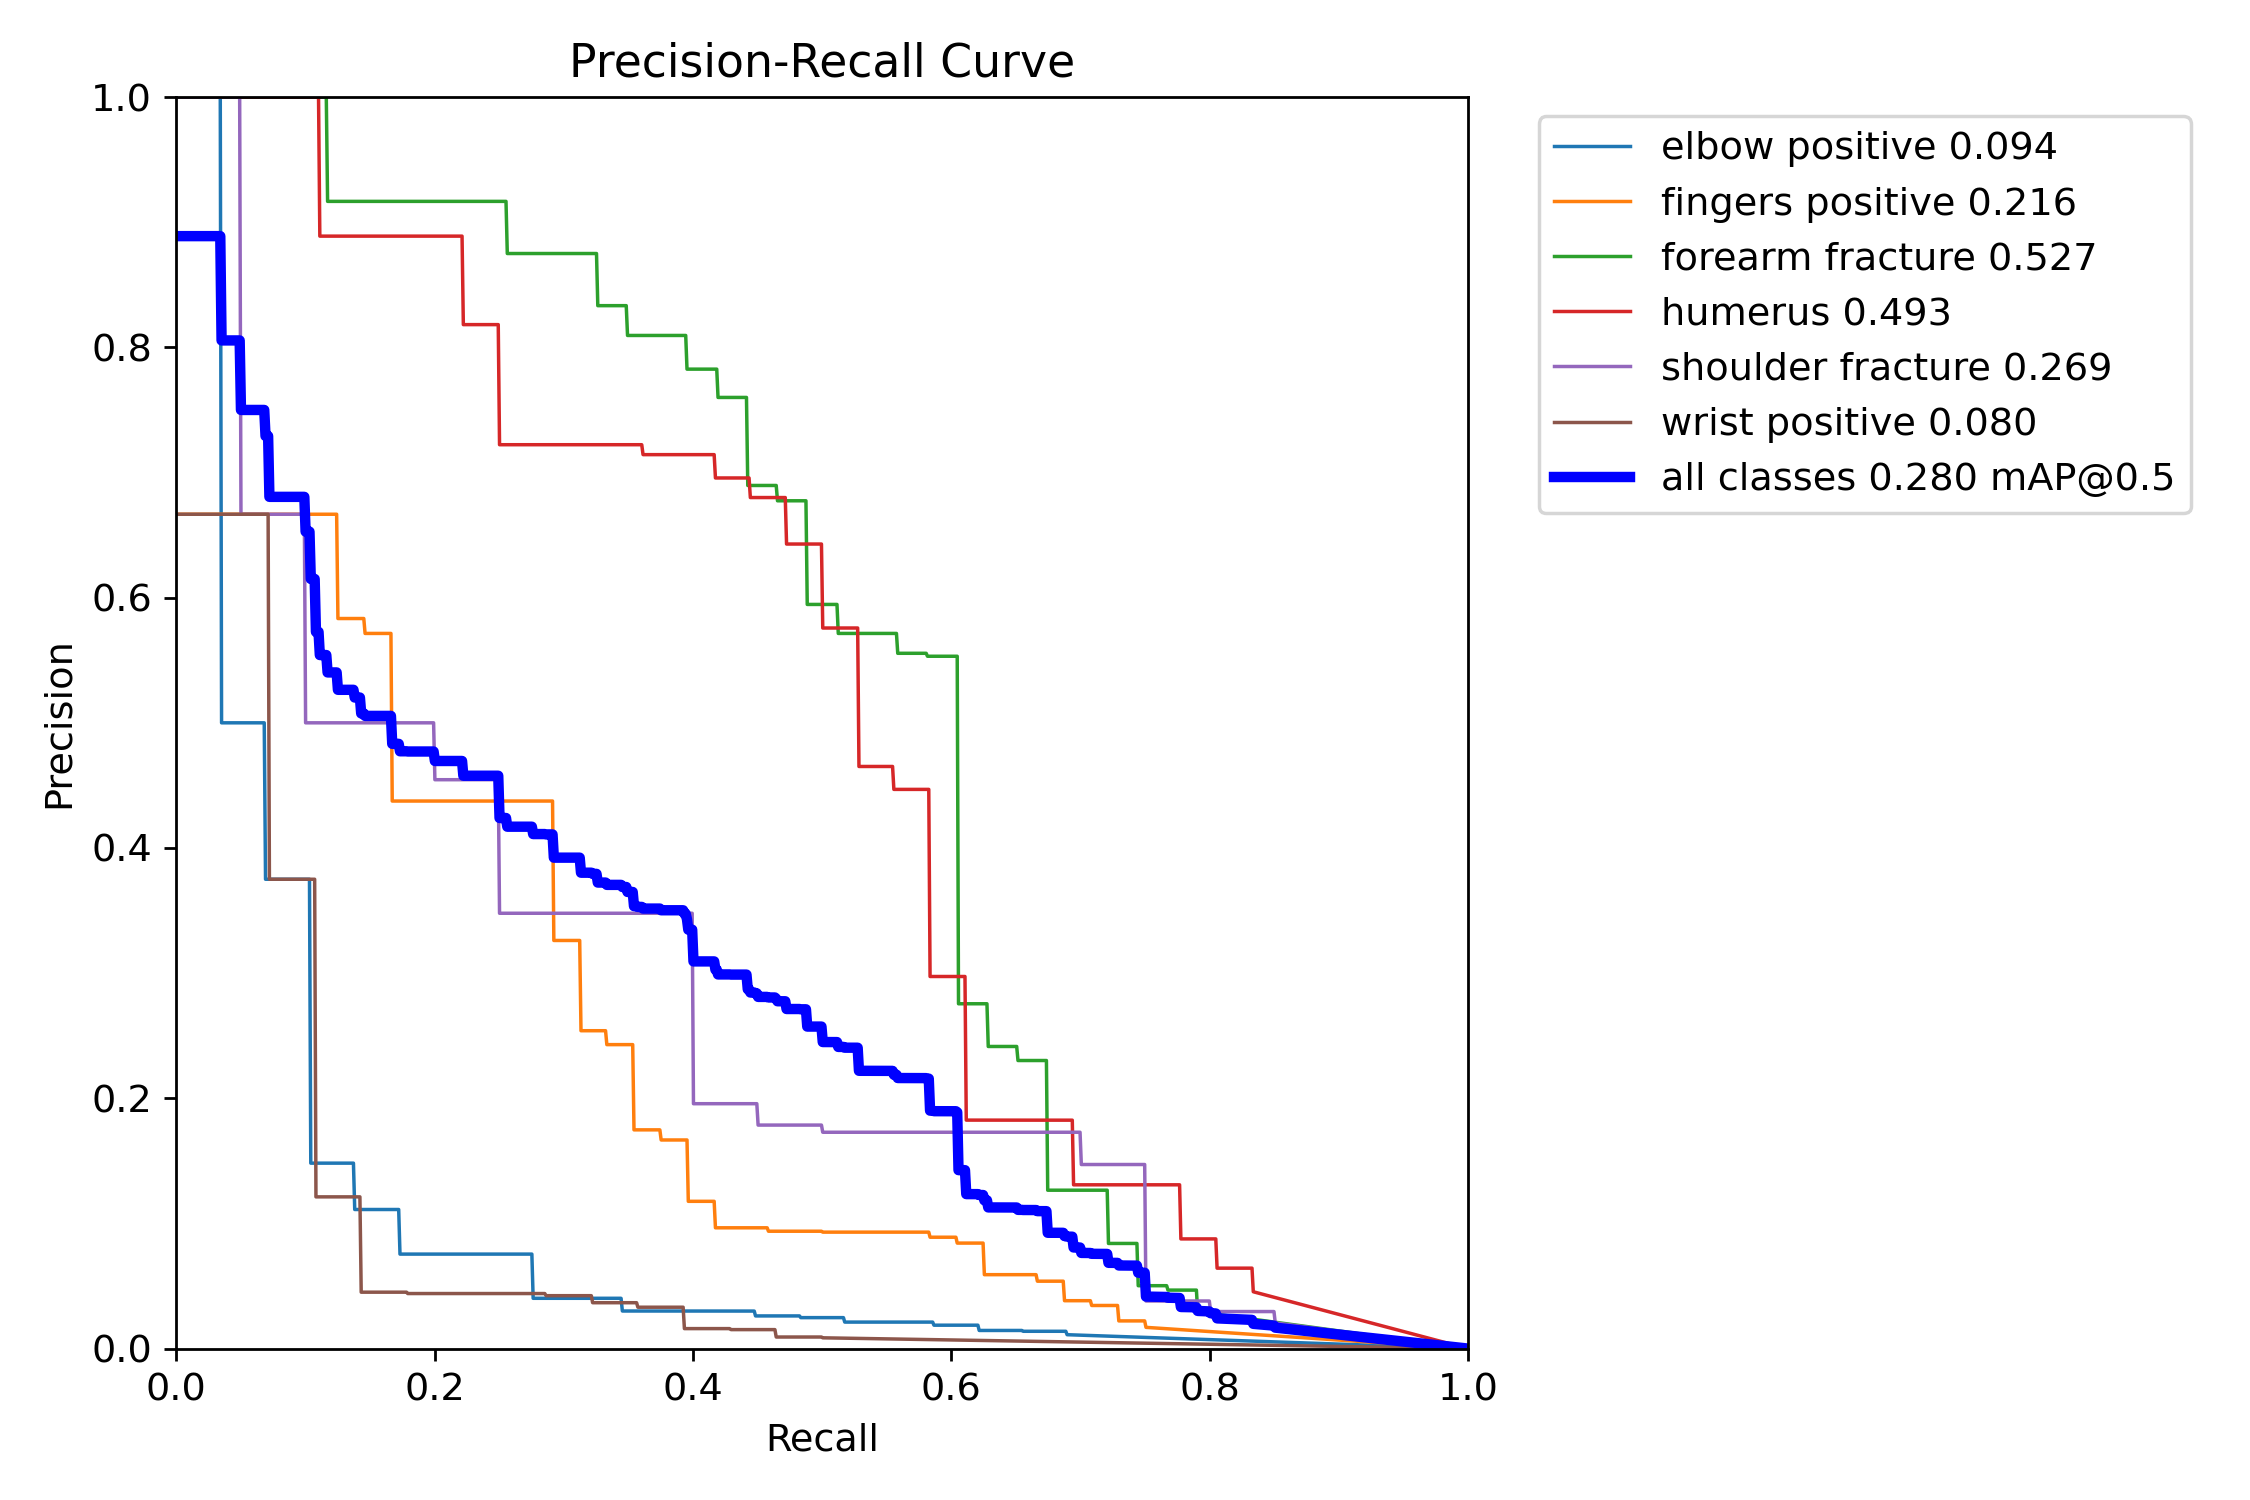

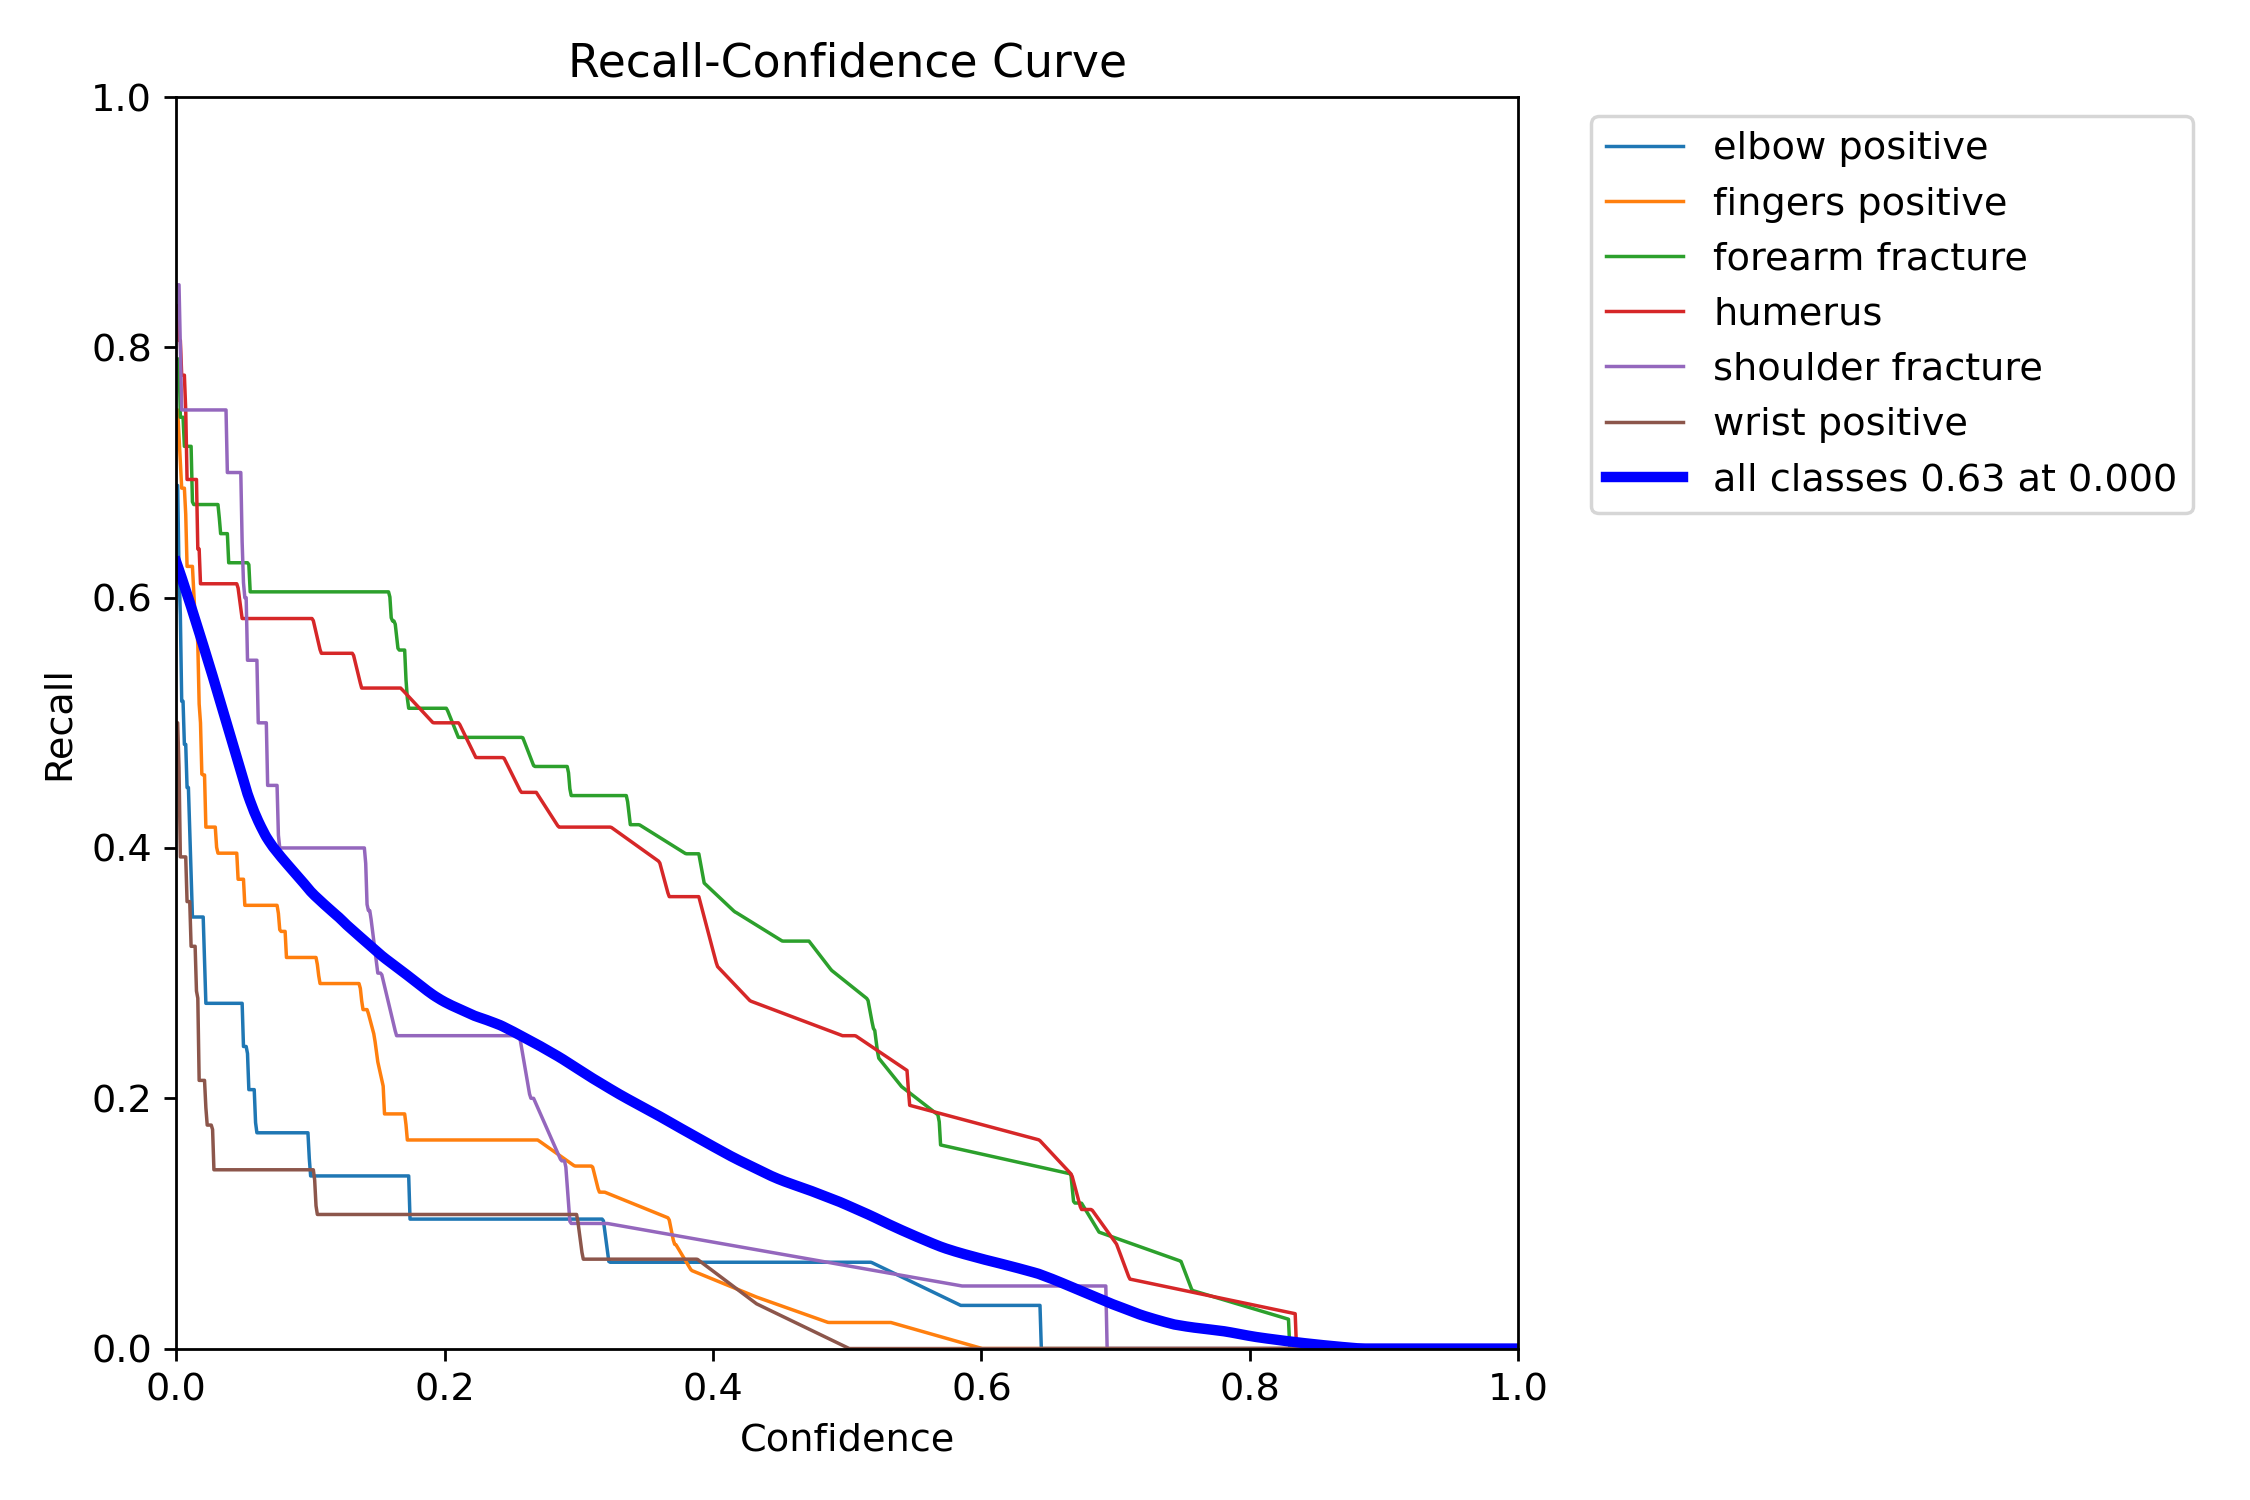

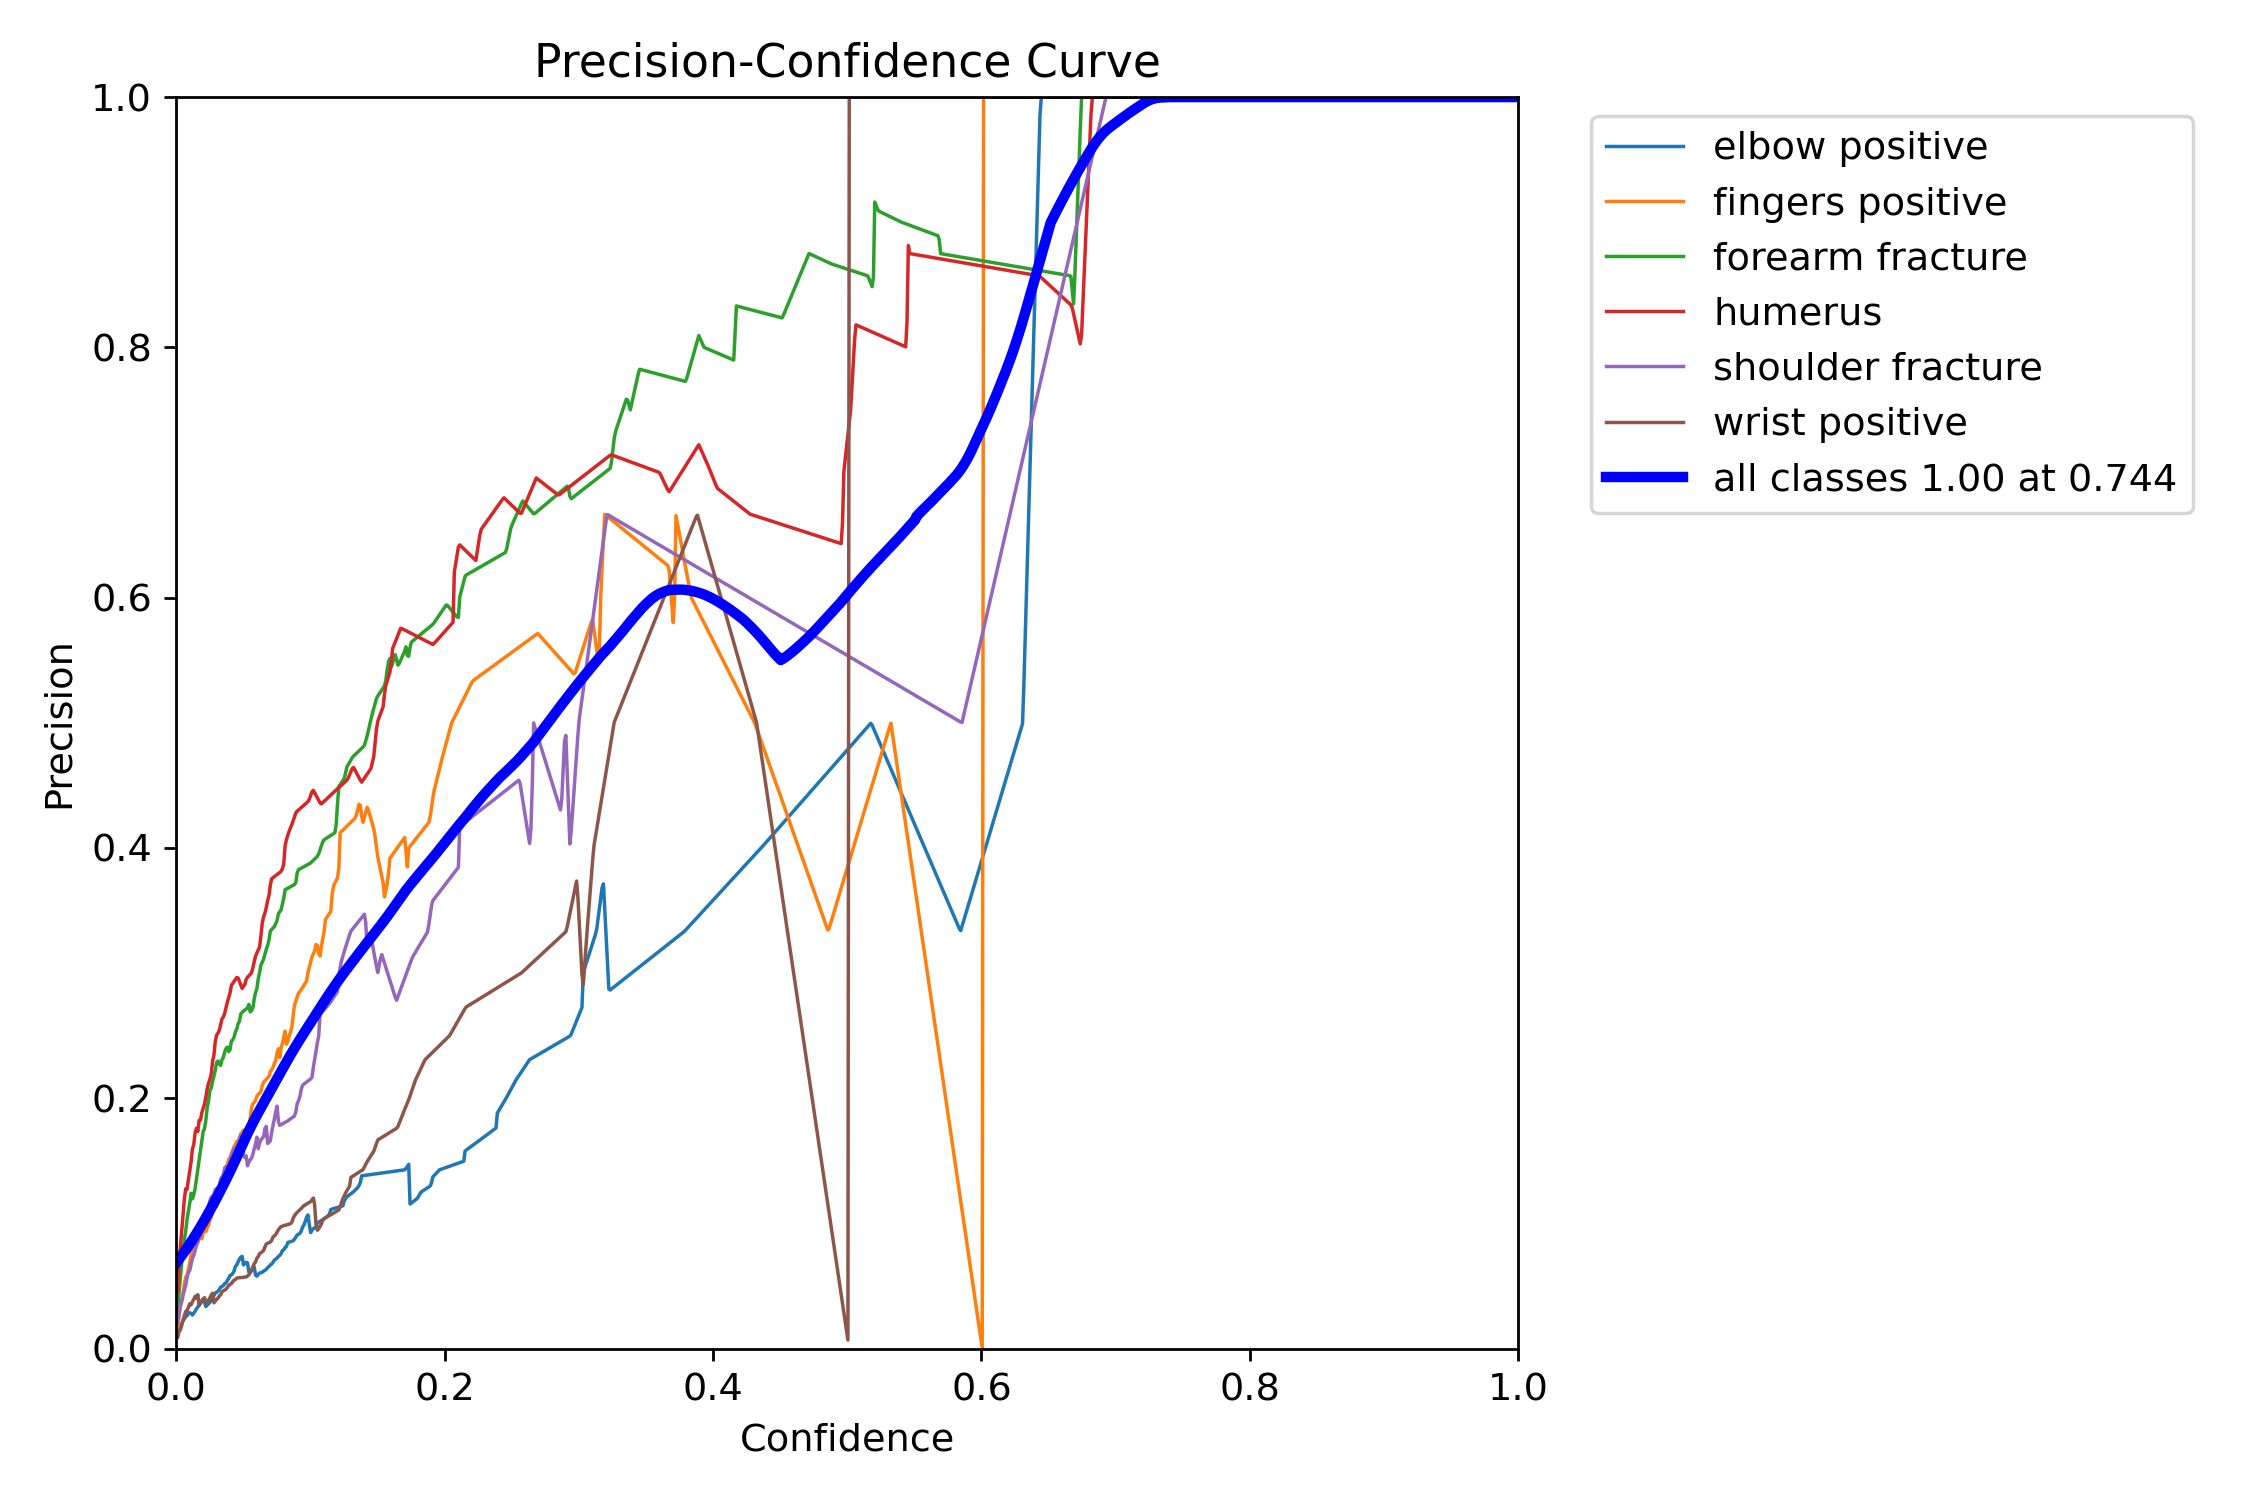

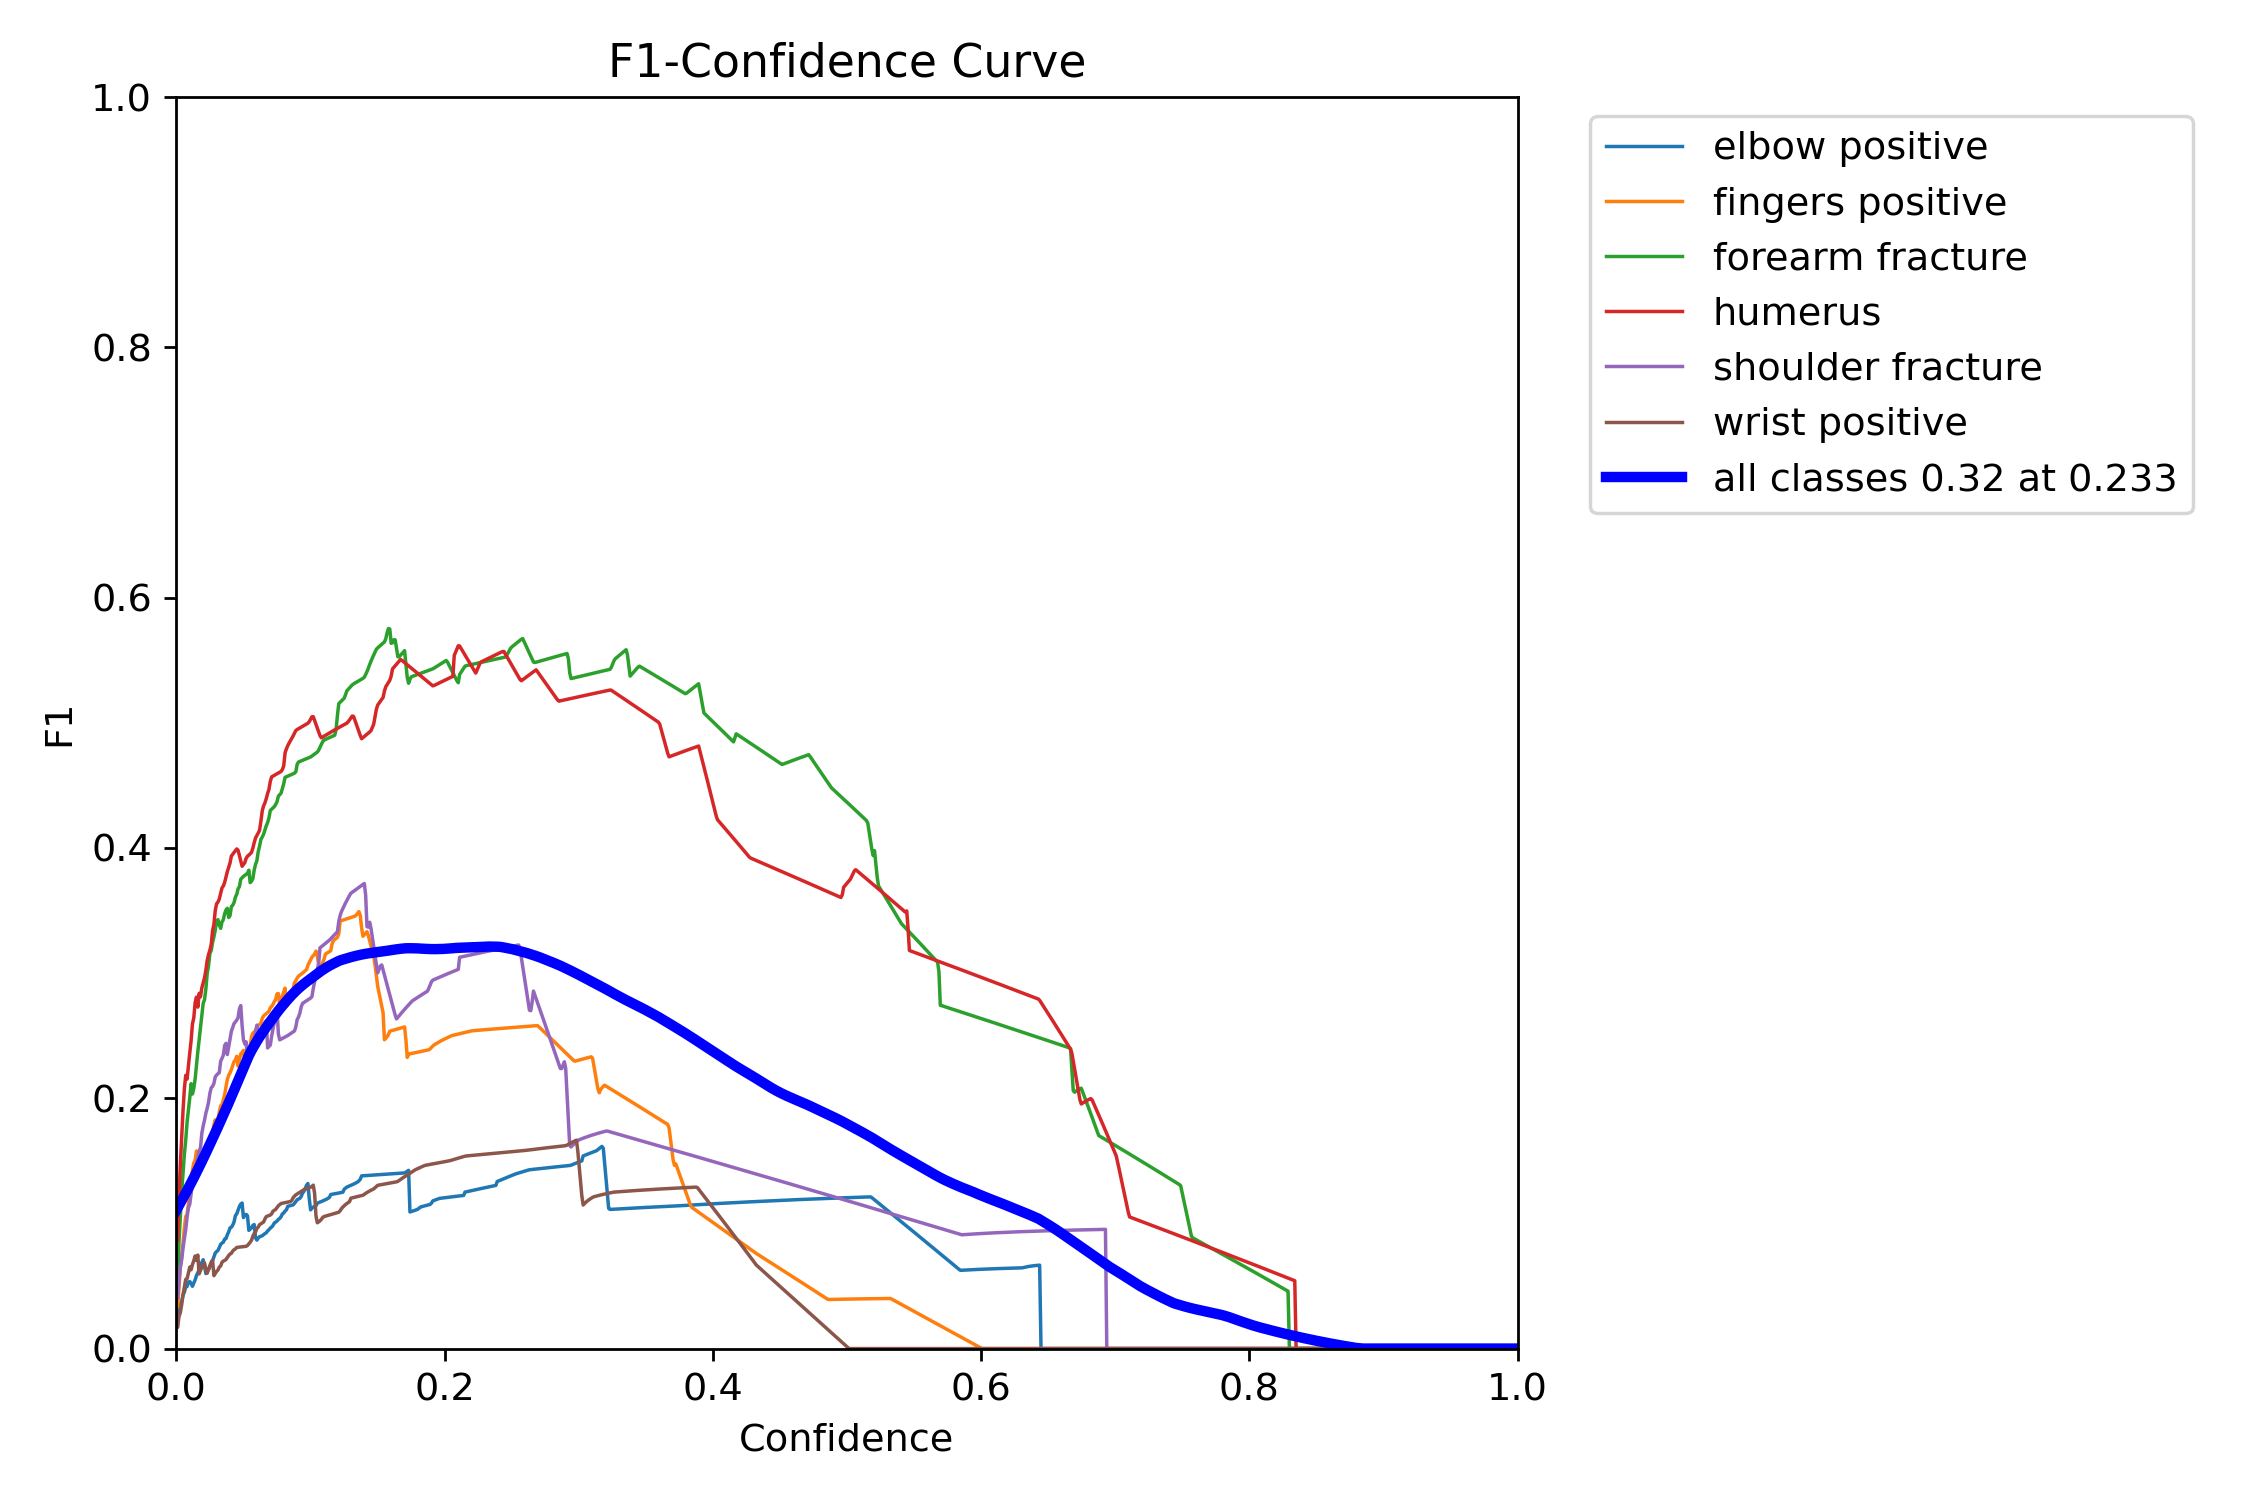

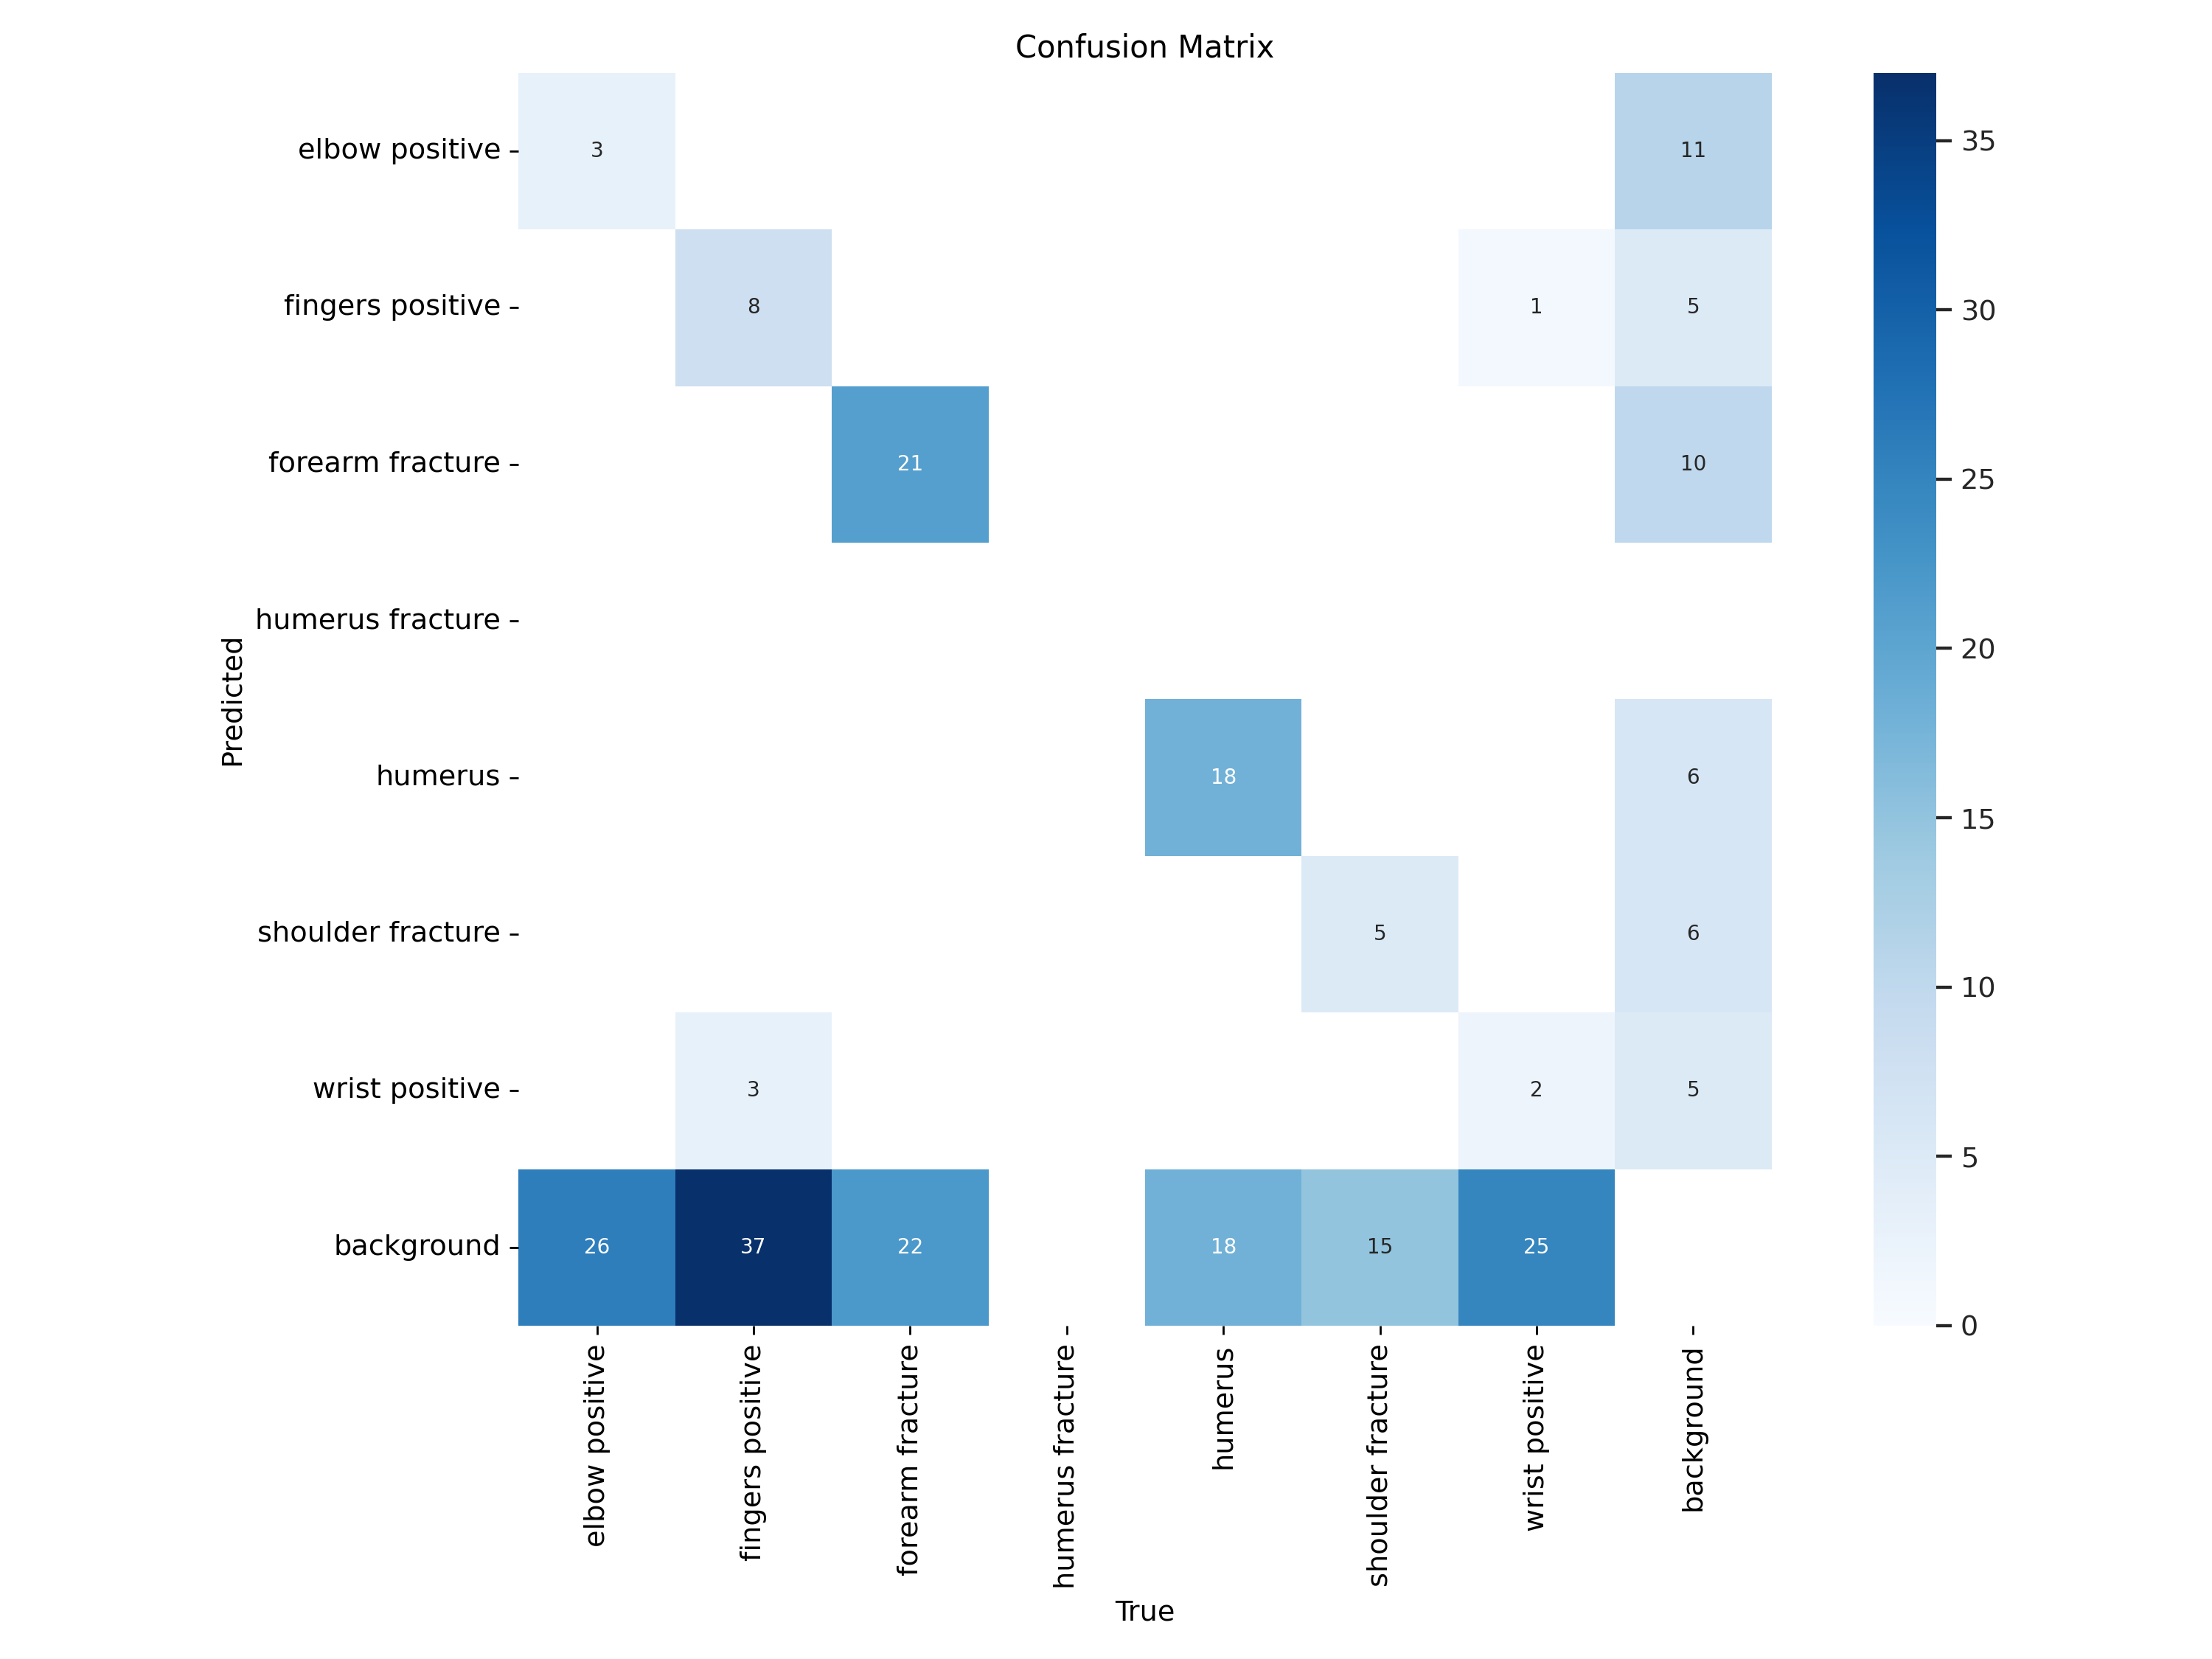

In [ ]:
#show the images of the graphs
val_dir = "runs/detect/val"

files = ["PR_curve.png", "R_curve.png", "P_curve.png", "F1_curve.png", "confusion_matrix.png"]

for file_name in files:
  img = cv2.imread(os.path.join(val_dir, file_name))
  cv2_imshow(img)
  print("\n")

In [ ]:
model = YOLO("runs/detect/train2/weights/best.pt")
model.predict(
    source="/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images", conf=0.25 , save=True
)


image 1/169 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg: 640x256 1 elbow positive, 47.4ms
image 2/169 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_0_png.rf.99862308d714bff3f9c410adf5ca93ac.jpg: 480x640 (no detections), 43.2ms
image 3/169 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_1000_png.rf.a53c5e186c03961bf88075c6e3e94cf6.jpg: 544x640 1 humerus, 44.2ms
image 4/169 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_1015_png.rf.3b7320c3c40771fa5532bf713a728b83.jpg: 544x640 (no detections), 15.3ms
image 5/169 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_1015_png.rf.9181f8eb07451331e22381bacb3a5bd2.jpg: 640x640 (no detections), 16.7ms
image 6/169 /kaggle/input/bo

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'elbow positive', 1: 'fingers positive', 2: 'forearm fracture', 3: 'humerus fracture', 4: 'humerus', 5: 'shoulder fracture', 6: 'wrist positive'}
 obb: None
 orig_img: array([[[ 7,  7,  7],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 3,  3,  3],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 9,  9,  9],
         ...,
         [ 0,  0,  0],
         [ 5,  5,  5],
         [ 0,  0,  0]],
 
        [[ 4,  4,  4],
         [15, 15, 15],
         [55, 55, 55],
         ...,
         [ 7,  7,  7],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 6,  6,  6],
         ...,
         [ 1,  1,  1],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 7,  7,  7],
         [ 5,  5,  5],


See Test Results

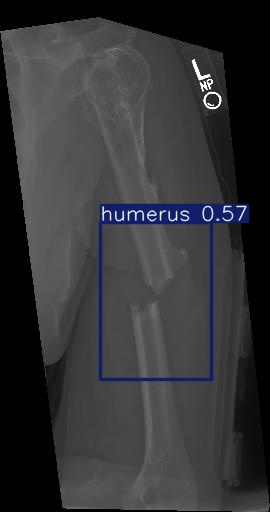

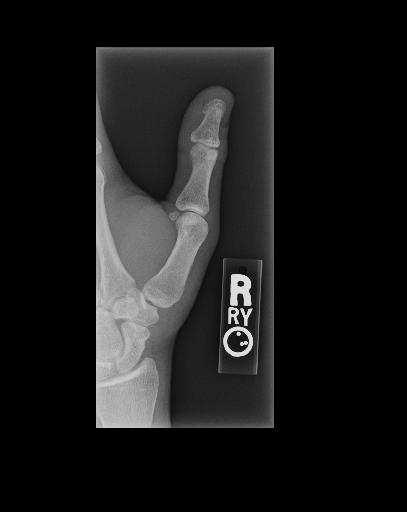

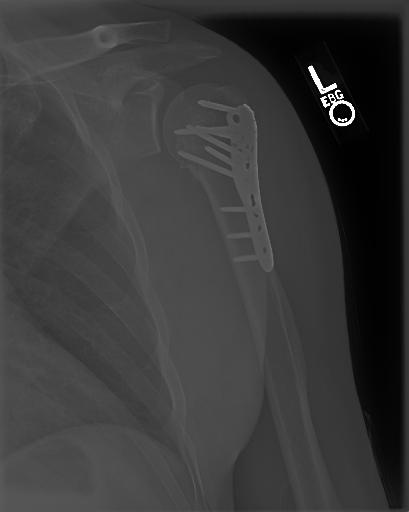

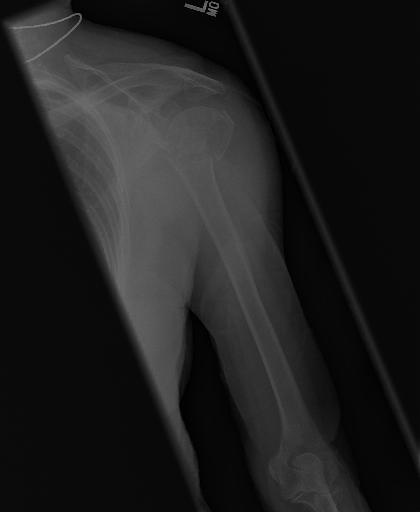

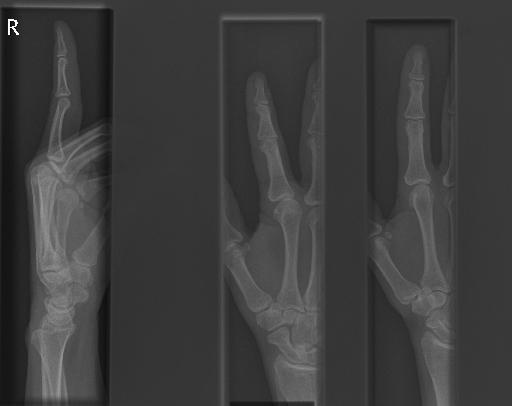

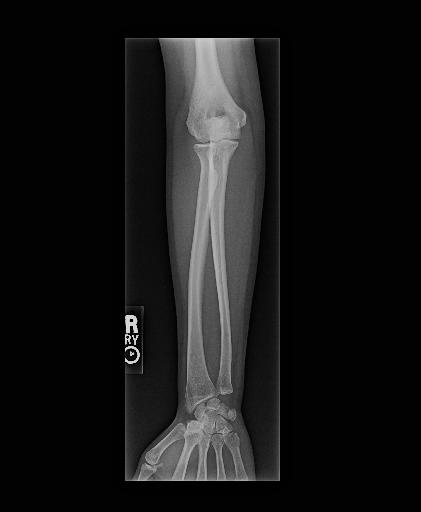

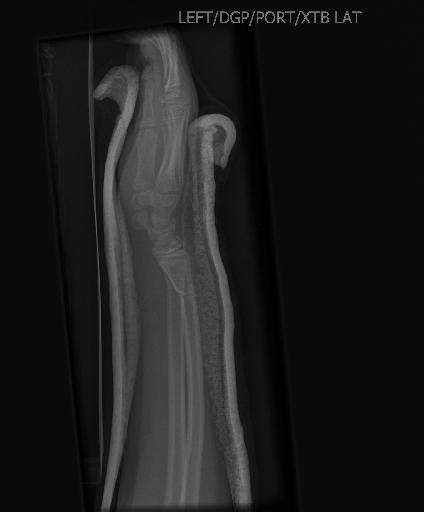

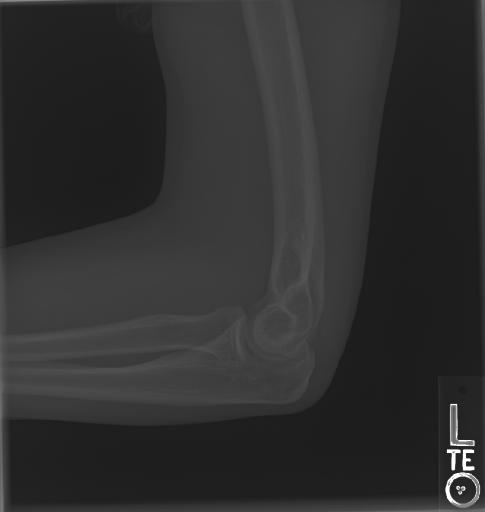

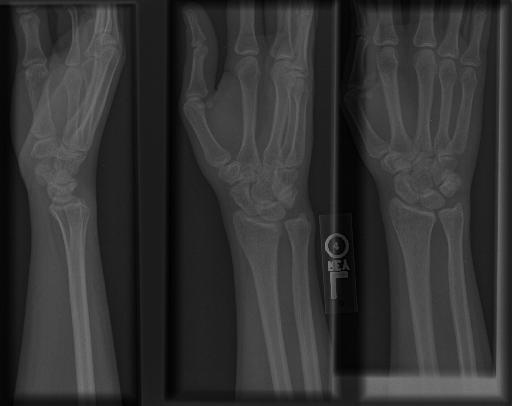

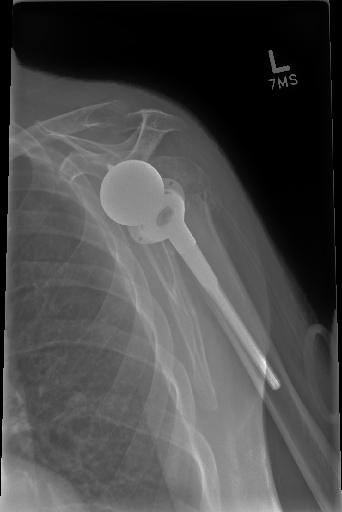

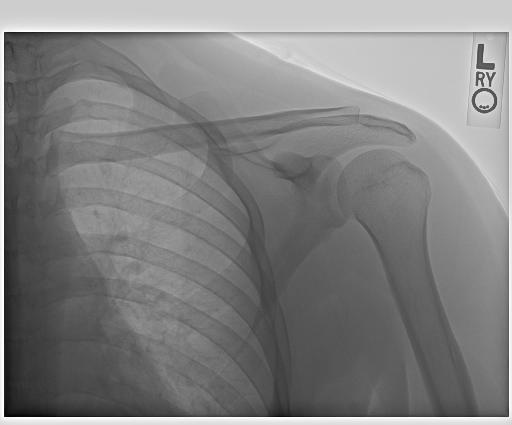

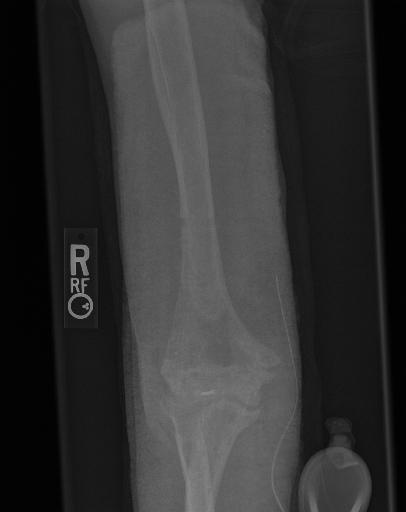

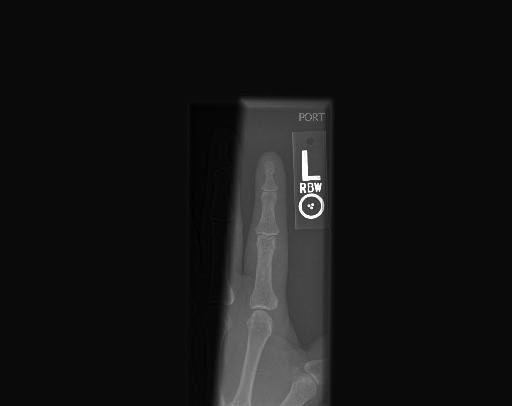

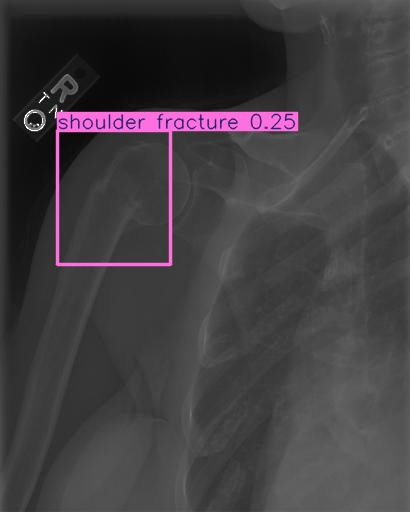

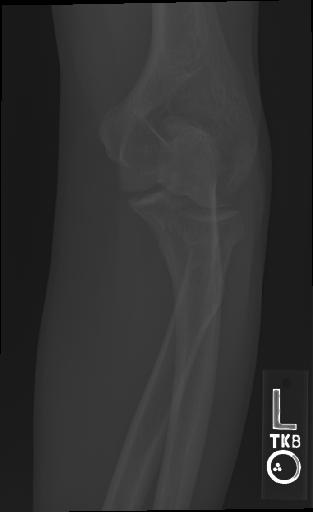

In [ ]:
pred_dir = "runs/detect/predict"

for file in os.listdir(pred_dir)[35:50]:
  img = cv2.imread(os.path.join(pred_dir, file))
  cv2_imshow(img)

  print("\n")